In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [18]:
import csv 
import random
import re
import codecs #provides transparent encoding/decoding
from textblob import TextBlob  #Library for Text Processing
import time
from collections import Counter

# Plotting dependecies

In [19]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# Sentiment values 

In [36]:
mod_pos=0
mod_neg=0
neutral=0
high_pos=0
high_neg=0
total=0
hashtags = []

In [37]:
print("Performing Sentiment Analysis",end="")
for i in range(5):
        print(".",end="")
        time.sleep(1) 

Performing Sentiment Analysis.....

# Reading csv file

In [38]:
filepath="C:/Users/ELCOT/Documents/bj/demonetization-tweets.csv"
with codecs.open(filepath, "r",encoding='utf-8', errors='ignore') as csvfile:
    reader = csv.reader(csvfile)
    tweetsList=[]
    cleanTweetsList=[]
    for row in reader:
        tweet=row[2].strip() #contains tweet
        cleanTweet=" ".join(re.findall("[a-zA-Z]+",tweet))
        analysis=TextBlob(cleanTweet) 
        
        #appending tweet to list 
        tweetsList.append(tweet) 
        cleanTweetsList.append(cleanTweet)


        #Assigning polarity and calculating count
        total=total+1
        if(analysis.sentiment.polarity>0 and analysis.sentiment.polarity<2):
            mod_pos=mod_pos+1
        elif(analysis.sentiment.polarity>=0 and analysis.sentiment.polarity<=4):
            high_pos=high_pos+1
        elif(analysis.sentiment.polarity>-2 and analysis.sentiment.polarity<0):
            mod_neg=mod_neg+1
        elif(analysis.sentiment.polarity>=-4 and analysis.sentiment.polarity<=-2):
            high_neg= high_neg+ 1
        else:
            neutral = neutral + 1

# Result

In [39]:
print("Total Tweets: ",total)
print('Moderate Positive = ',mod_pos)
print('High Positive = ',high_pos)
print('Moderate Negative= ',mod_neg)
print('High Negative= ',high_neg)
print('Neutral= ',neutral)

Total Tweets:  14941
Moderate Positive =  5989
High Positive =  6723
Moderate Negative=  2229
High Negative=  0
Neutral=  0


# Random number generator to pick tweets

In [24]:
randomTweets=[]
randomCleanTweets=[]
randomNumber=random.sample(range(1, 6000), 5)
index=0

# Collecting random tweets

In [25]:
for i in range(5):
    number=random.randint(1,6000) #Picks a random number between 1-6000
    randomTweets.append(tweetsList[randomNumber[index]]) #Stores a random tweet from data without repeatition
    randomCleanTweets.append(tweetsList[randomNumber[index]])
    index=index+1

for tweet in randomCleanTweets:
    print()
    print(tweet,end=' ')
    analysis=TextBlob(tweet)
    print(" => ",analysis.sentiment)


RT @Joydeep_911: Calling all Nationalists to join...
Walk for #CorruptionFreeIndia and spread the benefits of #Demonetization among the mas  =>  Sentiment(polarity=0.0, subjectivity=0.0)

RT @iarunmani: Left is going to file a petition in SC against govts decision on #demonetization . My que is why the hell don't you debate i  =>  Sentiment(polarity=0.0, subjectivity=0.0)

RT @centerofright: #DeMonetization - Some thoughts - 2 weeks over after that 8.00 PM speech. Lines hv reduced at banks for exchange. ATMs h  =>  Sentiment(polarity=0.0, subjectivity=0.0)

RT @Ateendriyo: Everyone that disagrees with you is not your enemy. Before calling everyone unhappy with #Demonetization corrupt and dalaal  =>  Sentiment(polarity=-0.55, subjectivity=0.95)

RT @Dipankar_cpiml: The Modi app on #DeMonetization proves once again that the govt is totally indifferent to the mounting misery and hards  =>  Sentiment(polarity=0.15, subjectivity=0.375)


# Writing random tweets to a text file for display

In [31]:
with open('tweets.txt', 'w') as file:
    for tweet in randomTweets:
        file.write(tweet)
        file.write('<br><br>\n')

# Finding the hashtags in all the tweets

In [32]:
finalcount={}
for i in tweetsList:
    hashtags.append(re.findall(r"#(\w+)", i))
hashtagnew = [item for sub in hashtags for item in sub]
counts = Counter(hashtagnew)
counts = dict(counts)
finalcount = dict(sorted(counts.items(), key=lambda kv: kv[1], reverse=True))
countname = list(finalcount.keys())


# Plotting data - Bar Graph

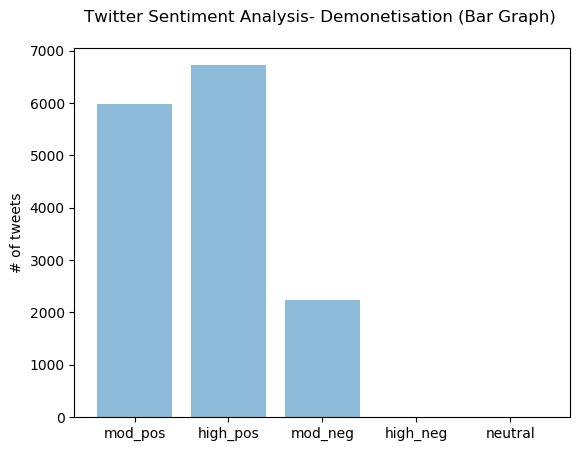

In [41]:
objects = ('mod_pos','high_pos','mod_neg','high_neg','neutral')
y_pos = np.arange(len(objects))
performance = [mod_pos,high_pos,mod_neg,high_neg,neutral]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('# of tweets')
plt.title('Twitter Sentiment Analysis- Demonetisation (Bar Graph) \n')
plt.show()

# Pie Graph

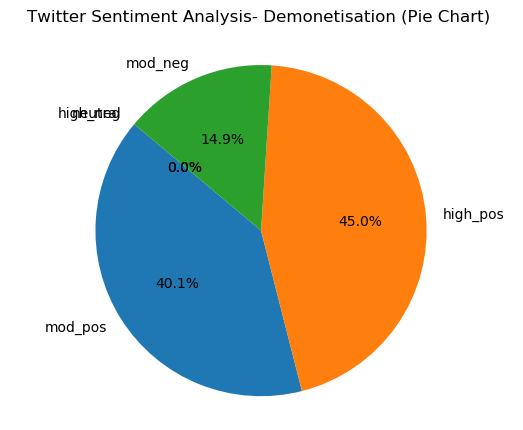

In [45]:
#colors = ['yellowgreen', 'gold', 'orangered']
#explode = (0, 0, 0.1)  # explode last slice

plt.pie(performance,  labels=objects,autopct='%1.1f%%', shadow=False, startangle=140)
 
plt.axis('equal')
plt.title('Twitter Sentiment Analysis- Demonetisation (Pie Chart) \n')
plt.show()


# Hashtag Plot

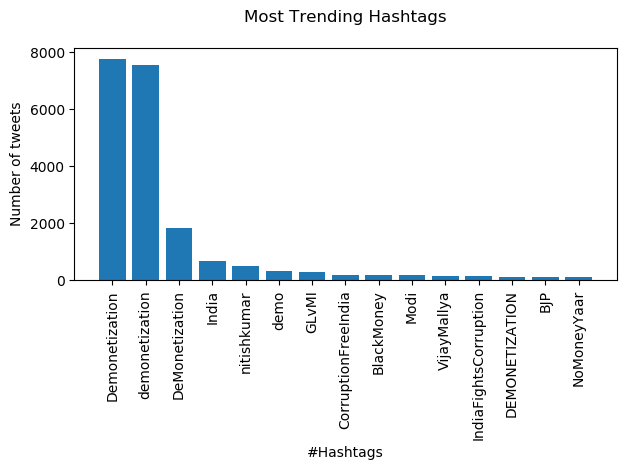

In [46]:
x = np.arange(len(finalcount))
y = list(finalcount.values())
x = x[:15]
y = y[:15]
countname = countname[:15]
plt.bar(x, y)
plt.title('Most Trending Hashtags\n')
plt.xticks(x, countname, rotation='vertical')
plt.ylabel('Number of tweets')
plt.xlabel('#Hashtags')
plt.tight_layout()
plt.show()